In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
import itertools, math

pd.set_option('display.float_format', '{:.5f}'.format)
%matplotlib inline

In [2]:
df = pd.read_csv('breast_cancer.csv')
initial_list = df.columns.tolist()
updated = [each.lower().replace(' ', '_') for each in initial_list]
rename_dict = {initial_list[i]: updated[i] for i in range(len(initial_list))}
df.rename(columns=rename_dict, inplace=True)
df.head()

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df_sub = df[['clump_thickness',
             'cell_size',
             'cell_shape',
             'marginal_adhesion',
             'single_epithelial_cell_size',
             'bare_nuclei',
             'bland_chromatin',
             'normal_nucleoli',
             'mitoses']]

data_gtlabel = df['class'].to_numpy()

#Breast Cancer Data 
num_feat_bc = df_sub.shape[1]
data_bc = df_sub.to_numpy()
num_points_bc = len(data_bc)

In [4]:
with open('random_data.txt') as f:
    data_rand = f.readlines()
data_np_rand = np.array([each.split() for each in data_rand])
X_rand = [float(each) for each in data_np_rand[:,0]]
Y_rand = [float(each) for each in data_np_rand[:,1]]

#Random Text Data 
num_feat_rand = data_np_rand.shape[1]
num_points_rand = len(X_rand)
data_rand = np.column_stack((X_rand, Y_rand))

In [5]:
def kmeans_cluster_func(n_clusters=None, data=None):
    n_clusters = n_clusters
    km = KMeans(n_clusters = n_clusters, random_state=42).fit(data)
    
    point_dict = {each+1: data[np.where(km.predict(data) == each)[0]] for each in range(km.n_clusters)}
    centroid_points = {idx+1: each for idx, each in enumerate(km.cluster_centers_)}
    
    return centroid_points, point_dict

def error_function(n_clusters=None, data=None):
    data_n_clusters = kmeans_cluster_func(n_clusters=n_clusters, data=data)
    dict_data_centroids = data_n_clusters[0]
    dict_data_points = data_n_clusters[1]

    sum_data_points = []

    for idx, each in enumerate(dict_data_centroids.values()):
        centroid_pos_x = each[0]
        centroid_pos_y = each[1]

        distance_data_points = []

        for idx_i, each_ in enumerate(dict_data_points[idx+1]):

            point_x = each_[0]
            point_y = each_[1]

            '''
            Sum of square distance. We are only computing the 
            sum of the errors for the points within each cluster 
            since all of the other values are `0` as
            indicated in Formula 1 of the homework (see the 
            support for `a_{nk}` in the homework) . We 
            take this value to be the "sum of square distances, 
            within each cluster."
            '''
            
            distance = np.absolute((point_x - centroid_pos_x) + (point_y - centroid_pos_y))**2
            distance_data_points.append(distance)
            total = np.sum(distance_data_points)
            
        sum_data_points.append(total)
    return np.sum(sum_data_points)

def func(n_clusters=None, m_features=None, n_points=None, data=None):
    model = error_function(n_clusters=n_clusters, data=data)
    bic = model + ((1/2.)*math.log10(n_points)*n_clusters*m_features)
    return {'n_clusters':  n_clusters, 'sum_square_error_J': model, 'bic': bic}

def plot_clusters(k_value=None, m_features=None, n_points=None, data=None, data_string=None, highlight=None):
    elbow_data = [func(n_clusters=each, 
                       m_features=m_features, 
                       n_points=n_points, 
                       data=data) for each in range(1, k_value+1)]
    offset = 2500
    x = [each['n_clusters'] for each in elbow_data]
    y = [each['sum_square_error_J'] for each in elbow_data]
    y_ = [each['bic'] - offset for each in elbow_data]
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='v', label='RSS', linestyle='dashed', color='black')
    plt.plot(x, y_, marker='^', label='BIC', linestyle='solid', color='black')

    plt.plot(elbow_data[highlight]['n_clusters'], 
             elbow_data[highlight]['sum_square_error_J'], 
             marker='v', 
             color='red', 
             label='k = ' + str(highlight+1) + ' Clusters')

    plt.plot(elbow_data[highlight]['n_clusters'], 
             elbow_data[highlight]['bic'] - offset, 
             marker='^', 
             color='red', 
             label='k = ' + str(highlight+1) + ' Clusters')

    plt.ylim(-2500, 50000, 5000)
    plt.xlim(0, 9)
    plt.xlabel('(num. clusters) \n Value of `k`', fontsize=14)
    plt.ylabel('Error Value \n (arb. units)', fontsize=14)
    plt.yticks(fontsize=13)
    plt.xticks(fontsize=13)
    plt.title('Elbow Plot \n k-Means Clustering ' + "(" + data_string +")", fontsize=14)
    plt.legend(fontsize=13)
    plt.show()

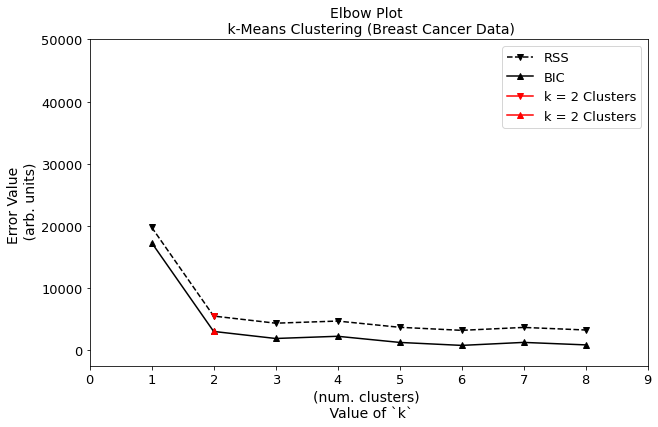

In [6]:
plot_clusters(k_value=8, 
              m_features=num_feat_bc, 
              n_points=num_points_bc, 
              data=data_bc, data_string="Breast Cancer Data", highlight=1)

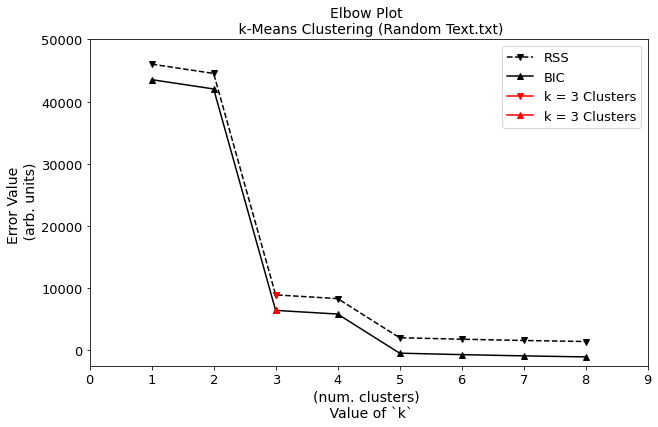

In [7]:
plot_clusters(k_value=8, 
              m_features=num_feat_rand, 
              n_points=num_points_rand, 
              data=data_rand, data_string="Random Text.txt", highlight=2)

In [8]:
elbow_data_rand = [func(n_clusters=each, 
                        m_features=num_feat_rand, 
                        n_points=num_points_rand, 
                        data=data_rand) for each in range(1, 8+1)]

elbow_data_bc = [func(n_clusters=each, 
                        m_features=num_feat_bc, 
                        n_points=num_points_bc, 
                        data=data_bc) for each in range(1, 8+1)]

In [9]:
elbow_data_rand

[{'n_clusters': 1,
  'sum_square_error_J': 46023.87854871573,
  'bic': 46026.87854871573},
 {'n_clusters': 2,
  'sum_square_error_J': 44522.93842600519,
  'bic': 44528.93842600519},
 {'n_clusters': 3,
  'sum_square_error_J': 8882.016463873415,
  'bic': 8891.016463873415},
 {'n_clusters': 4,
  'sum_square_error_J': 8283.830844718543,
  'bic': 8295.830844718543},
 {'n_clusters': 5,
  'sum_square_error_J': 1986.4197077743204,
  'bic': 2001.4197077743204},
 {'n_clusters': 6,
  'sum_square_error_J': 1748.280118413325,
  'bic': 1766.280118413325},
 {'n_clusters': 7,
  'sum_square_error_J': 1543.4977879945063,
  'bic': 1564.4977879945063},
 {'n_clusters': 8,
  'sum_square_error_J': 1376.4346393964925,
  'bic': 1400.4346393964925}]

In [10]:
elbow_data_bc

[{'n_clusters': 1,
  'sum_square_error_J': 19768.844062947064,
  'bic': 19781.64421023792},
 {'n_clusters': 2,
  'sum_square_error_J': 5472.711193824097,
  'bic': 5498.311488405808},
 {'n_clusters': 3,
  'sum_square_error_J': 4325.917462786623,
  'bic': 4364.3179046591895},
 {'n_clusters': 4,
  'sum_square_error_J': 4668.471257180348,
  'bic': 4719.671846343771},
 {'n_clusters': 5,
  'sum_square_error_J': 3666.335660580021,
  'bic': 3730.336397034299},
 {'n_clusters': 6,
  'sum_square_error_J': 3175.6694592406448,
  'bic': 3252.470342985778},
 {'n_clusters': 7,
  'sum_square_error_J': 3645.0486270187375,
  'bic': 3734.6496580547264},
 {'n_clusters': 8,
  'sum_square_error_J': 3230.890514031203,
  'bic': 3333.291692358048}]